In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import linregress
from scipy.stats import linregress

# Starting URL for Weather Map API Call.
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-61.45970710796276 -135.68214404682638
60.500872716240366 -25.127826356599286
30.2802436722624 -158.59896880656524
46.78753247317013 -175.81945725265948
-52.72994624891324 -33.72766245037113
-28.39094242468599 79.71560461440225
-8.407715698260262 -97.34159237546409
-22.13972969685345 92.38594938599448
78.36845684501304 60.62322988891094
8.07432429045734 94.61933265903127
33.379971370330495 -32.38078103786165
85.8745956948434 27.907871653718416
83.04414604535714 77.86641537880286
-83.80894517747615 -146.31013397202838
68.28043313429606 71.9828913842365
-53.00254929683339 105.29017534356774
81.56272418075056 -75.87773515500423
29.47416454228332 -53.95137122484623
-55.17110811173987 87.03465716419117
-35.069479404384836 -51.18086727239543
-5.583836246101271 -105.68730818690857
-67.06399341617613 154.04675172513515
-30.48812659534704 -82.18601988182364
83.63737582832815 119.60730357303197
42.228177979659336 -115.24604999709108
-7.318339764134365 68.36600505605904
-1.5073645387468844 -57.20

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

rikitea pf
grindavik is
kapaa us
provideniya ru
chuy uy
bambous virieux mu
puerto ayora ec
labuhan id
amderma ru
sabang id
ribeira grande pt
longyearbyen sj
dikson ru
mataura pf
yar-sale ru
busselton au
qaanaaq gl
saint george bm
busselton au
chuy uy
puerto ayora ec
bluff nz
coquimbo cl
saskylakh ru
twin falls us
hithadhoo mv
nhamunda br
matara lk
cherskiy ru
atherton au
port hedland au
murray bridge au
bengkulu id
bluff nz
loralai pk
ponta do sol pt
bredasdorp za
jamestown sh
east london za
lebu cl
rikitea pf
mataura pf
bakel sn
saint george bm
saint-philippe re
verkhnetulomskiy ru
mahebourg mu
rikitea pf
vaini to
barentsburg sj
saurimo ao
yecla es
georgetown sh
tucupita ve
buin pg
kahului us
haines junction ca
kenai us
beaver falls us
santa rosa bo
mys shmidta ru
illoqqortoormiut gl
farah af
khatanga ru
hilo us
navalmoral de la mata es
saint-joseph re
mys shmidta ru
taolanaro mg
ushuaia ar
ushuaia ar
tuktoyaktuk ca
ulladulla au
saint george bm
rikitea pf
punta arenas cl
port alfred z

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing Record 1 of Set 12 | rikitea
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 12 | grindavik
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 12 | kapaa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 12 | provideniya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 12 | chuy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 12 | bambous virieux
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 12 | puerto ayora
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 12 | labuhan
-----------------------------
Data R

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.96,78,100,16.46,PF,2022-07-17 16:44:10
1,Grindavik,63.8424,-22.4338,53.55,82,75,10.36,IS,2022-07-17 16:44:10
2,Kapaa,22.0752,-159.3190,79.12,82,75,18.41,US,2022-07-17 16:44:11
3,Provideniya,64.3833,-173.3000,50.52,97,100,5.23,RU,2022-07-17 16:44:11
4,Chuy,-33.6971,-53.4616,51.76,62,0,13.85,UY,2022-07-17 16:43:05
5,Bambous Virieux,-20.3428,57.7575,70.05,68,40,18.41,MU,2022-07-17 16:41:16
6,Puerto Ayora,-0.7393,-90.3518,73.36,88,72,5.99,EC,2022-07-17 16:44:12
7,Labuhan,-6.8844,112.2051,78.13,84,100,11.27,ID,2022-07-17 16:44:12
8,Sabang,5.8933,95.3214,82.65,74,74,5.97,ID,2022-07-17 16:44:13
9,Ribeira Grande,38.5167,-28.7000,77.40,73,40,18.41,PT,2022-07-17 16:41:57


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,73.96,78,100,16.46,PF,2022-07-17 16:44:10
1,Grindavik,63.8424,-22.4338,53.55,82,75,10.36,IS,2022-07-17 16:44:10
2,Kapaa,22.0752,-159.3190,79.12,82,75,18.41,US,2022-07-17 16:44:11
3,Provideniya,64.3833,-173.3000,50.52,97,100,5.23,RU,2022-07-17 16:44:11
4,Chuy,-33.6971,-53.4616,51.76,62,0,13.85,UY,2022-07-17 16:43:05
...,...,...,...,...,...,...,...,...,...
550,Klyuchi,52.2667,79.1667,64.00,58,2,15.37,RU,2022-07-17 16:59:21
551,Mareeba,-17.0000,145.4333,63.32,90,29,2.15,AU,2022-07-17 16:59:22
552,Coromandel,-18.4733,-47.2003,82.92,24,86,6.55,BR,2022-07-17 16:59:22
553,Mogocha,53.7333,119.7667,60.53,98,100,1.90,RU,2022-07-17 16:59:23


In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime('%x')
today

'07/17/22'

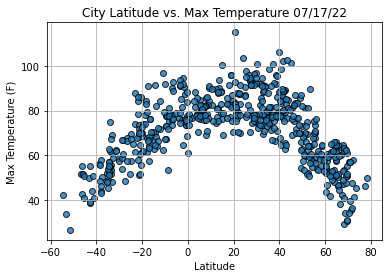

In [17]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(city_data_df["Lat"],
            city_data_df["Max Temp"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

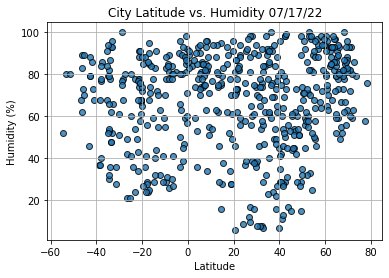

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

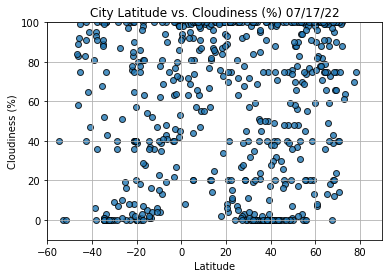

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(-10,100)
plt.xlim(-60,90)
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

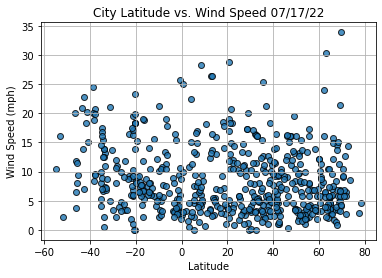

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Grindavik,63.8424,-22.4338,53.55,82,75,10.36,IS,2022-07-17 16:44:10
2,Kapaa,22.0752,-159.3190,79.12,82,75,18.41,US,2022-07-17 16:44:11
3,Provideniya,64.3833,-173.3000,50.52,97,100,5.23,RU,2022-07-17 16:44:11
8,Sabang,5.8933,95.3214,82.65,74,74,5.97,ID,2022-07-17 16:44:13
9,Ribeira Grande,38.5167,-28.7000,77.40,73,40,18.41,PT,2022-07-17 16:41:57
...,...,...,...,...,...,...,...,...,...
547,Bradenton,27.4989,-82.5748,91.26,56,28,1.01,US,2022-07-17 16:57:14
548,Killam,52.7834,-111.8518,64.35,82,83,5.75,CA,2022-07-17 16:59:20
550,Klyuchi,52.2667,79.1667,64.00,58,2,15.37,RU,2022-07-17 16:59:21
553,Mogocha,53.7333,119.7667,60.53,98,100,1.90,RU,2022-07-17 16:59:23


In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Grindavik,63.8424,-22.4338,53.55,82,75,10.36,IS,2022-07-17 16:44:10
2,Kapaa,22.0752,-159.3190,79.12,82,75,18.41,US,2022-07-17 16:44:11
3,Provideniya,64.3833,-173.3000,50.52,97,100,5.23,RU,2022-07-17 16:44:11
8,Sabang,5.8933,95.3214,82.65,74,74,5.97,ID,2022-07-17 16:44:13
9,Ribeira Grande,38.5167,-28.7000,77.40,73,40,18.41,PT,2022-07-17 16:41:57


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

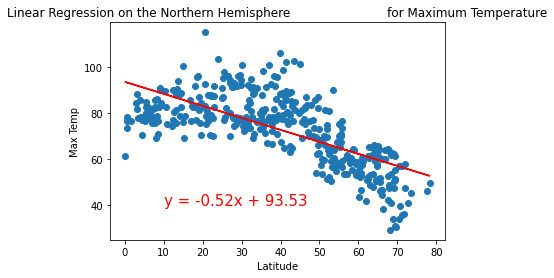

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

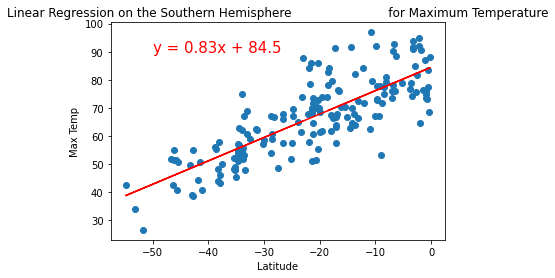

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

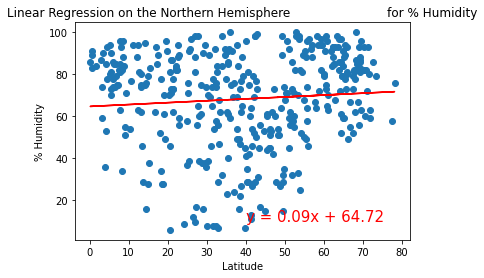

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

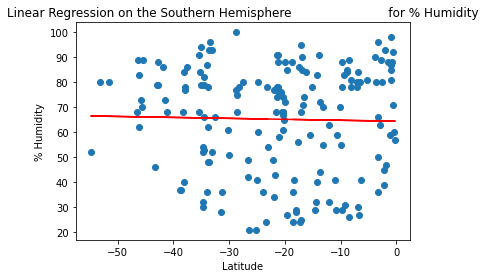

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

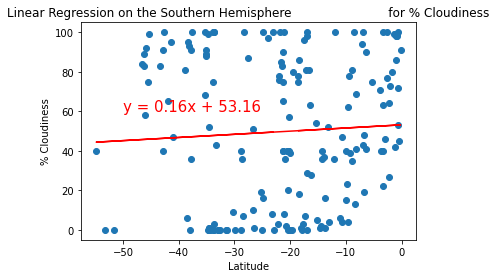

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

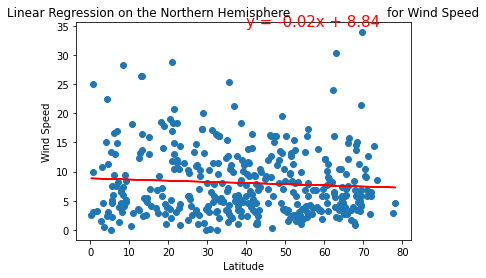

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

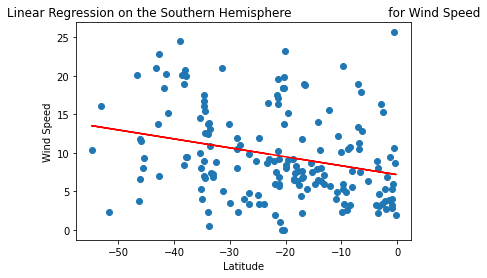

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))